In [1]:
import pandas as pd
import geojson
from datetime import datetime, timedelta

from corncast import Location, corn_forecast

In [2]:
rose = Location("Mt. Rose Summit", 39.3144, -119.9173)
berk = Location("Berkeley", 37.8715, -122.27)

Calling: /points/39.3144,-119.9173
Calling: https://api.weather.gov/gridpoints/REV/40,97/stations
Calling: /stations/SLIDE/observations?start=2023-11-18T21%3A26%3A48Z&end=2023-11-23T21%3A26%3A48Z


/home/smerdis/Dropbox/code/corncast/corncast/corncast.py:180: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  obs_df_full = pd.concat([pd.json_normalize(o) for o in loc.get_obs(start, end)], ignore_index=True)


Calling: /points/39.3144,-119.9173
Calling: https://api.weather.gov/gridpoints/REV/40,97/forecast/hourly


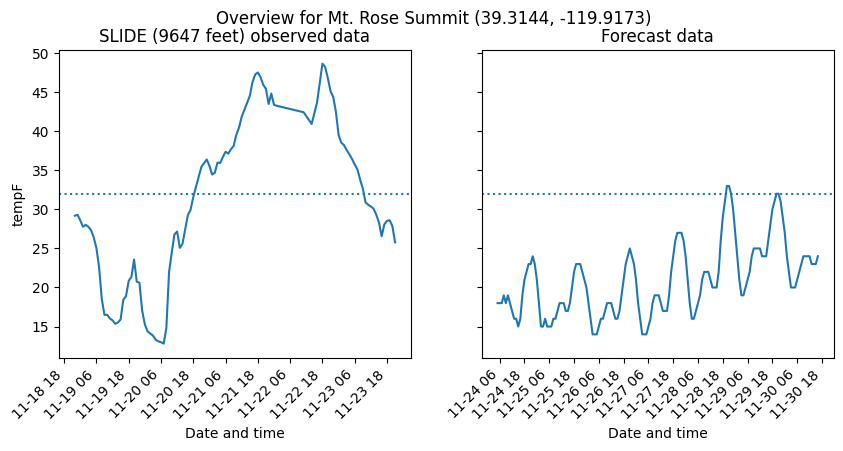

In [3]:
(obs_df, comb_6h_df) = corn_forecast(rose)

In [4]:
def highlight(row):
    if row['cycle'] and row['obs_precip_iszero']:
        return ['background-color: green'] * len(row)
    else:
        return ['background-color: white'] * len(row)

fmts = {'date':lambda x: f"{x:%m-%d}",
        'obs_precip': lambda x: f"{x:.1f}"}
out = comb_6h_df.style.apply(highlight, axis=1)
out.format(fmts).hide(subset=['obs_precip_iszero'], axis=1)

,date,cycle,obs_precip,prob_precip
0,11-18,False,0.0,nan
1,11-19,False,0.0,nan
2,11-20,True,0.0,nan
3,11-21,False,0.0,nan
4,11-22,False,0.0,nan
5,11-23,True,0.0,nan
6,11-24,False,nan,20.000000
7,11-25,False,nan,6.000000
8,11-26,False,nan,2.000000
9,11-27,False,nan,1.000000


In [5]:
# set up some variables
now = datetime.now()
obs_period = timedelta(days=5)
start = now-obs_period
end = now
tcol = 'tempF'
foo = pd.concat([pd.json_normalize(o) for o in rose.get_obs(start, end)], ignore_index=True)

Calling: /points/39.3144,-119.9173
Calling: https://api.weather.gov/gridpoints/REV/40,97/stations
Calling: /stations/SLIDE/observations?start=2023-11-18T21%3A26%3A51Z&end=2023-11-23T21%3A26%3A51Z


/tmp/ipykernel_528347/1239433699.py:7: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  foo = pd.concat([pd.json_normalize(o) for o in rose.get_obs(start, end)], ignore_index=True)
